# Uber 2024 Data Analytics

***Imoport Libraries***

In [440]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

***Import Data Set***

In [441]:
df = pd.read_csv('~/Documents/data_sets/uber_data_set/ncr_ride_bookings.csv')
df

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2024-11-11,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,...,NaN,NaN,NaN,NaN,NaN,475.0,40.08,3.7,4.1,Uber Wallet
149996,2024-11-24,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,...,NaN,NaN,NaN,NaN,NaN,1093.0,21.31,4.8,5.0,UPI
149997,2024-09-18,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,...,NaN,NaN,NaN,NaN,NaN,852.0,15.93,3.9,4.4,Cash
149998,2024-10-05,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,...,NaN,NaN,NaN,NaN,NaN,333.0,45.54,4.1,3.7,UPI


In [442]:
df.columns

Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method'],
      dtype='object')

***Data Cleaning***

In [443]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [444]:
df.info()
#checking for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [445]:
df1 = df.duplicated().sum()
df1

#checking for duplicated values

np.int64(0)

In [446]:
#no duplicated values

In [447]:
df.isnull().sum()

#checking for null values in each column

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64

In [448]:
# numeric: Avg VTAT, Avg CTAT, Cancelled Rides by Customer, Cancelled Rides by Driver, Incomplete Rides, Booking Value, Ride Distance, Driver Rating, Customer Rating
# categorical: Reason for cancelling by Customer, Driver Cancellation Reason. Incomplete Rides Reason, Payment Method

Cleaning Numerical and Categorical Null Values 

In [449]:
#Avg VTAT
df['Avg VTAT'].unique()

array([ nan,  4.9, 13.4, 13.1,  5.3,  5.1,  7.1, 12.1,  6.1,  7.7,  4.6,
       12.2, 14. ,  8.5,  5.6,  6. , 12.4, 10.3,  7. , 10.4,  7.9, 13.6,
       11.5,  3.1,  8.9,  9.2,  2. ,  5.4, 14.6,  6.7,  6.6, 10. , 11. ,
        8. , 12.8,  6.4, 11.3,  2.3,  7.8,  8.8,  9.9,  4.1, 11.2,  3. ,
        9.1,  4.3, 11.4,  6.3, 11.7, 16.6,  5.8,  4. ,  3.4, 11.1,  5.9,
        8.1,  5. , 12. ,  3.2,  9.6,  3.9,  8.4, 10.9,  5.7,  8.6,  9.5,
        2.6,  2.1, 14.4,  7.5, 10.8, 14.7,  3.5,  8.3, 11.9, 12.5, 13.3,
        9.7,  3.6,  9.4,  9. ,  2.4, 19.1,  2.9, 18.5, 16.1, 13.7,  4.5,
        6.9,  6.2,  7.2,  3.7, 11.6,  3.3,  4.7,  7.4,  9.3,  8.2, 13.5,
        4.4,  2.7,  7.3, 10.5,  6.8, 10.7, 12.3,  3.8, 10.2,  9.8,  8.7,
       14.2,  6.5, 12.9,  4.2,  5.2, 16.9,  7.6, 14.9, 11.8, 14.3, 10.1,
       12.6, 14.8, 13.2, 14.5,  4.8, 14.1,  2.5, 15. , 16.2, 12.7,  5.5,
        2.8, 19.2, 18. , 13.9, 13. , 10.6, 20. , 17.6, 15.7,  2.2, 16.5,
       15.9, 19.6, 19.9, 19.8, 16. , 16.4, 13.8, 18

In [450]:
total_null_avg_vtat = df['Avg VTAT'].isna().sum()
total_null_avg_vtat

np.int64(10500)

In [451]:
total_rows = df.shape[0]
total_rows

150000

In [452]:
avg_vtat_data_loss = (total_null_avg_vtat/total_rows) * 100
avg_vtat_data_loss
#if data loss is > 5% then the data should not be dropped
#data manipulation will be used

np.float64(7.000000000000001)

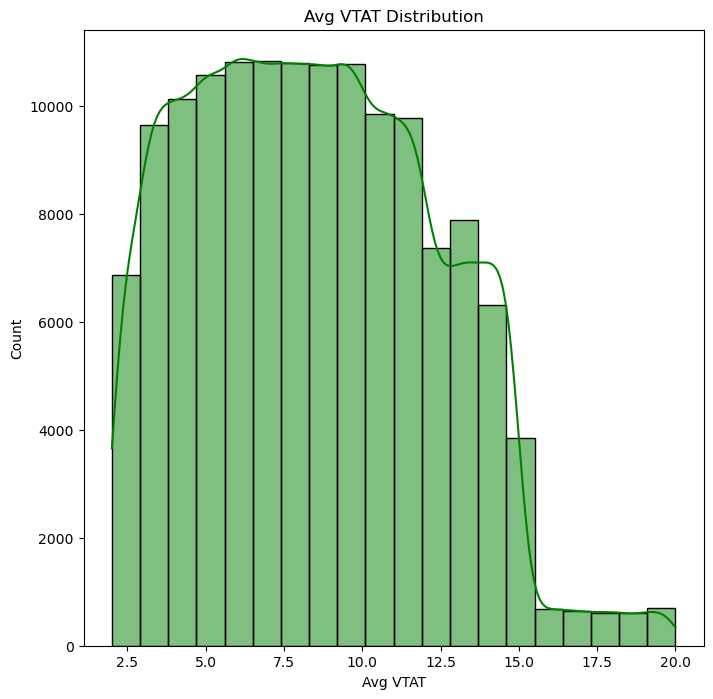

In [453]:
#checking for appropriate replacement based on the distribution of the Avg VTAT values

plt.figure(figsize=(8,8))
sns.histplot(df['Avg VTAT'], bins= 20, kde=True, color='green')
plt.title('Avg VTAT Distribution')
plt.show()

In [454]:
#while the histogram appears to have a small tail on the right, the overall plot has an even distribution resembling a bell shape
#since the Avg VTAT has a nomal distributin, mean will be used for replacing the null values

In [455]:
vtat_mean = df['Avg VTAT'].mean()
vtat_mean

np.float64(8.456351971326164)

In [456]:
df['Avg VTAT'].fillna(vtat_mean, inplace=True)
df['Avg VTAT'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 150000 entries, 0 to 149999
Series name: Avg VTAT
Non-Null Count   Dtype  
--------------   -----  
150000 non-null  float64
dtypes: float64(1)
memory usage: 1.1 MB


In [457]:
#Avg CTAT
df['Avg CTAT'].unique()

array([ nan, 14. , 25.8, 28.5, 19.6, 18.1, 20.4, 16.5, 26. , 18.9, 28.2,
       30.9, 36.9, 27.5, 33.7, 21.3, 25.1, 41.1, 25.2, 20.7, 31.1, 41. ,
       20.5, 19.4, 25.4, 30. , 35.8, 18.7, 10.5, 42.3, 29.7, 42.2, 21.6,
       40.7, 35.4, 23.2, 42.1, 21.5, 33. , 10.1, 24.3, 44.5, 27.1, 38.5,
       17.2, 37.3, 26.7, 34.7, 39.1, 23. , 31.3, 43.7, 35. , 15.6, 43.6,
       18. , 32.7, 24.6, 38.9, 16.4, 36.2, 35.5, 41.7, 38. , 40. , 37. ,
       40.4, 28.7, 30.6, 21.1, 18.8, 30.4, 15.9, 21.9, 25. , 44.4, 16.7,
       26.3, 15.8, 31.5, 30.7, 23.6, 24.2, 17.9, 15.5, 25.3, 37.4, 22.8,
       28.9, 44.7, 24.8, 26.6, 32.6, 24.4, 39.3, 32.5, 43.1, 26.5, 17. ,
       20.6, 37.7, 40.2, 31.6, 33.5, 32.9, 17.7, 39. , 18.4, 41.8, 22. ,
       10.3, 15.7, 16.8, 22.2, 33.1, 27.9, 34.1, 33.9, 22.4, 34.6, 20.2,
       30.8, 20. , 43.4, 27.2, 30.5, 27.4, 28.1, 31.4, 15.3, 39.9, 37.9,
       37.8, 40.6, 23.7, 31.9, 19.7, 23.1, 20.9, 25.5, 42.5, 29.8, 42.6,
       41.6, 34.9, 23.4, 17.3, 41.2, 27.3, 20.1, 18

In [458]:
total_null_avg_ctat = df['Avg CTAT'].isna().sum()
total_null_avg_ctat

np.int64(48000)

In [459]:
avg_ctat_data_loss = (total_null_avg_ctat/total_rows) * 100
avg_ctat_data_loss
#since 32% > 5%, dropping is not an option
#since 32% is almost a third of the data set, more caution should be used while applying data manipulation
#to be safe, the column will be dropped

np.float64(32.0)

In [460]:
df = df.drop(['Avg CTAT'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 20 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           150000 non-null  float64
 9   Cancelled Rides by Customer        10500 non-null   float64
 10  Reason for cancelling by Customer  10500 non-null   object 
 11  Cancelled Rides by Driver          2700

In [461]:
# the column Avg CTAT has been removed

In [462]:
#Cancelled Rides by Customer
df['Cancelled Rides by Customer'].unique()

array([nan,  1.])

In [463]:
df['Cancelled Rides by Customer'].fillna(0, inplace=True)
df['Cancelled Rides by Customer'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 150000 entries, 0 to 149999
Series name: Cancelled Rides by Customer
Non-Null Count   Dtype  
--------------   -----  
150000 non-null  float64
dtypes: float64(1)
memory usage: 1.1 MB


In [464]:
#Reason for cancelling by Customer
df['Reason for cancelling by Customer'].unique()

array([nan, 'Driver is not moving towards pickup location',
       'Driver asked to cancel', 'AC is not working', 'Change of plans',
       'Wrong Address'], dtype=object)

In [465]:
df[df['Reason for cancelling by Customer'].isna()]['Cancelled Rides by Customer'].unique()
#checking if there is no reason for cancelling by customer only if there was no cancellation by customer

array([0.])

In [466]:
df['Reason for cancelling by Customer'].fillna('no cancellation', inplace=True)
df['Reason for cancelling by Customer'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 150000 entries, 0 to 149999
Series name: Reason for cancelling by Customer
Non-Null Count   Dtype 
--------------   ----- 
150000 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


In [467]:
#Cancelled Rides by Driver
df['Cancelled Rides by Driver'].unique()

array([nan,  1.])

In [468]:
df['Cancelled Rides by Driver'].fillna(0, inplace=True)
df['Cancelled Rides by Driver'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 150000 entries, 0 to 149999
Series name: Cancelled Rides by Driver
Non-Null Count   Dtype  
--------------   -----  
150000 non-null  float64
dtypes: float64(1)
memory usage: 1.1 MB


In [469]:
#Driver Cancellation Reason
df['Driver Cancellation Reason'].unique()

array([nan, 'Personal & Car related issues', 'Customer related issue',
       'More than permitted people in there',
       'The customer was coughing/sick'], dtype=object)

In [470]:
df[df['Driver Cancellation Reason'].isna()]['Cancelled Rides by Driver'].unique()
#checking if there was no reason for cancellation by the driver only if there was no cancellation by driver

array([0.])

In [471]:
df['Driver Cancellation Reason'].fillna('no cancellation', inplace=True)
df['Driver Cancellation Reason'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 150000 entries, 0 to 149999
Series name: Driver Cancellation Reason
Non-Null Count   Dtype 
--------------   ----- 
150000 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


In [472]:
#Incomplete Rides
df['Incomplete Rides'].unique()

array([nan,  1.])

In [473]:
df['Incomplete Rides'].fillna(0, inplace=True)
df['Incomplete Rides'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 150000 entries, 0 to 149999
Series name: Incomplete Rides
Non-Null Count   Dtype  
--------------   -----  
150000 non-null  float64
dtypes: float64(1)
memory usage: 1.1 MB


In [474]:
#Incomplete Rides Reason
df['Incomplete Rides Reason'].unique()

array([nan, 'Vehicle Breakdown', 'Other Issue', 'Customer Demand'],
      dtype=object)

In [475]:
df[df['Incomplete Rides Reason'].isna()]['Incomplete Rides'].unique()
#checking if there are any no incomplete rides reason for completed rides

array([0.])

In [476]:
df['Incomplete Rides Reason'].fillna('Ride Completed', inplace=True)
df['Incomplete Rides Reason'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 150000 entries, 0 to 149999
Series name: Incomplete Rides Reason
Non-Null Count   Dtype 
--------------   ----- 
150000 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


In [477]:
#Booking Value
df['Booking Value'].nunique()

2566

In [478]:
total_null_booking_value = df['Booking Value'].isna().sum()
total_null_booking_value

np.int64(48000)

In [479]:
booking_value_data_loss = (total_null_booking_value/total_rows) * 100
booking_value_data_loss
#similar to Avg CTAT, since 32% of booking value column has null values, it is best to drop the column

np.float64(32.0)

In [480]:
df = df.drop(['Booking Value'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 19 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           150000 non-null  float64
 9   Cancelled Rides by Customer        150000 non-null  float64
 10  Reason for cancelling by Customer  150000 non-null  object 
 11  Cancelled Rides by Driver          1500

In [481]:
#the column Booking Value has been removed

In [482]:
#Ride Distance
df['Ride Distance'].nunique()

4901

In [483]:
total_null_ride_distance = df['Ride Distance'].isna().sum()
total_null_ride_distance

np.int64(48000)

In [484]:
ride_distance_data_loss = (total_null_ride_distance/total_rows) * 100
ride_distance_data_loss

np.float64(32.0)

In [485]:
#Ride Distance column will be dropped due to high percent of null values

In [486]:
df = df.drop(['Ride Distance'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           150000 non-null  float64
 9   Cancelled Rides by Customer        150000 non-null  float64
 10  Reason for cancelling by Customer  150000 non-null  object 
 11  Cancelled Rides by Driver          1500

In [487]:
#Driver Ratings
df['Driver Ratings'].unique()

array([nan, 4.9, 4.6, 4.1, 4. , 4.4, 4.2, 4.7, 3.8, 5. , 3.7, 3.1, 4.5,
       3.9, 4.3, 3.3, 3.2, 4.8, 3.6, 3.5, 3.4, 3. ])

In [488]:
total_null_driver_ratings = df['Driver Ratings'].isna().sum()
total_null_driver_ratings

np.int64(57000)

In [489]:
driver_ratings_data_loss = (total_null_driver_ratings/total_rows) * 100
driver_ratings_data_loss

np.float64(38.0)

In [490]:
#since 38% is really high percent of null values driver ratings column will also be dropped

In [491]:
df = df.drop(['Driver Ratings'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 17 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           150000 non-null  float64
 9   Cancelled Rides by Customer        150000 non-null  float64
 10  Reason for cancelling by Customer  150000 non-null  object 
 11  Cancelled Rides by Driver          1500

In [492]:
#the column Driver Ratings was dropped

In [493]:
#Customer Rating

In [494]:
df['Customer Rating'].unique()

array([nan, 4.9, 5. , 4.3, 4.6, 4.1, 4.2, 4.7, 4.4, 3.6, 4.5, 3.3, 3.8,
       3.7, 4.8, 3.9, 3.4, 3.2, 3.1, 4. , 3. , 3.5])

In [495]:
total_null_customer_rating = df['Customer Rating'].isna().sum()
total_null_customer_rating

np.int64(57000)

In [496]:
customer_rating_data_loss = (total_null_customer_rating/total_rows) * 100
customer_rating_data_loss

np.float64(38.0)

In [497]:
#38% null values are too high to replace so the entire column will be dropped

In [498]:
df = df.drop(['Customer Rating'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 16 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           150000 non-null  float64
 9   Cancelled Rides by Customer        150000 non-null  float64
 10  Reason for cancelling by Customer  150000 non-null  object 
 11  Cancelled Rides by Driver          1500

In [499]:
#the column Customer Rating was dropped

In [500]:
#Payment Method
df['Payment Method'].unique()

array([nan, 'UPI', 'Debit Card', 'Cash', 'Uber Wallet', 'Credit Card'],
      dtype=object)

In [501]:
df['Payment Method'].fillna('Payment Method Unknown', inplace=True)
df['Payment Method'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 150000 entries, 0 to 149999
Series name: Payment Method
Non-Null Count   Dtype 
--------------   ----- 
150000 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


In [502]:
# Final Data Set after data cleaning:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 16 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           150000 non-null  float64
 9   Cancelled Rides by Customer        150000 non-null  float64
 10  Reason for cancelling by Customer  150000 non-null  object 
 11  Cancelled Rides by Driver          1500

In [503]:
# no null values, irrelevant or disruptive columns removed

In [504]:
df.sample(5)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Payment Method
65353,2024-07-11,19:41:39,"""CNR2107209""",Incomplete,"""CID1463863""",eBike,Sarai Kale Khan,Patel Chowk,3.1,0.0,no cancellation,0.0,no cancellation,1.0,Other Issue,Credit Card
88750,2024-03-12,18:01:56,"""CNR4910258""",Completed,"""CID4429009""",Go Sedan,Ashram,Yamuna Bank,12.1,0.0,no cancellation,0.0,no cancellation,0.0,Ride Completed,UPI
71718,2024-02-01,16:24:01,"""CNR6851195""",Completed,"""CID4669087""",Auto,Lok Kalyan Marg,Ashram,14.1,0.0,no cancellation,0.0,no cancellation,0.0,Ride Completed,UPI
79593,2024-10-23,15:31:42,"""CNR9636031""",Incomplete,"""CID1169238""",Auto,Bahadurgarh,India Gate,2.5,0.0,no cancellation,0.0,no cancellation,1.0,Vehicle Breakdown,UPI
70536,2024-01-26,00:32:32,"""CNR5928940""",Completed,"""CID9081695""",Premier Sedan,Badarpur,Chirag Delhi,12.3,0.0,no cancellation,0.0,no cancellation,0.0,Ride Completed,Cash


Checking for Outliers in Avg VTAT

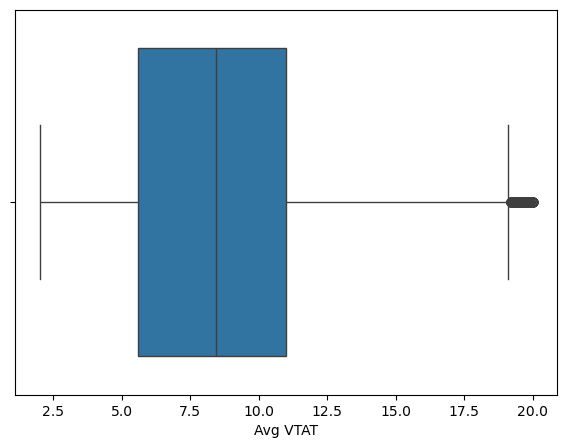

In [505]:
plt.figure(figsize=(7,5))
sns.boxplot(x=df['Avg VTAT'])
plt.show()

In [506]:
#to check for and remove any outliers, the following function will be used

In [507]:
def outlier_remover(df_column):
    Q1 = np.percentile(df_column, 25)
    Q3 = np.percentile(df_column, 75)

    IQR = Q3 - Q1

    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    return lower_bound, upper_bound



#function finds the lower and upper bound for given column in a data set

In [508]:
df_lb, df_ub = outlier_remover(df['Avg VTAT'])
df_lb, df_ub

#finding the lower and upper bound of Avg VTAT

(np.float64(-2.5000000000000018), np.float64(19.1))

In [509]:
df = df[(df['Avg VTAT'] > df_lb) & (df['Avg VTAT'] < df_ub)]

#removing the outliers from the Avg VTAT column

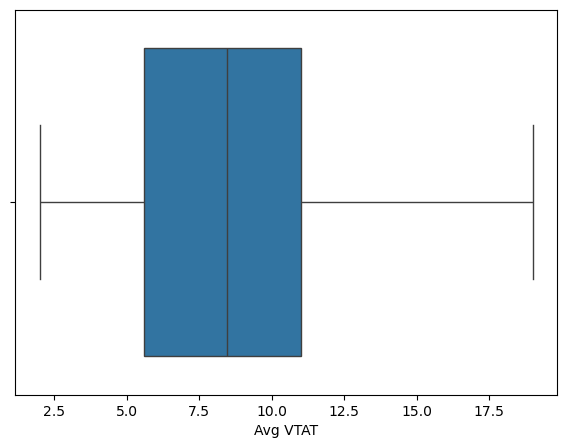

In [510]:
plt.figure(figsize=(7,5))
sns.boxplot(x=df['Avg VTAT'])
plt.show()

In [511]:
# new boxplot of Avt VTAT shows the outliers removed and the column is ready for exploration

In [512]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149310 entries, 0 to 149999
Data columns (total 16 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               149310 non-null  object 
 1   Time                               149310 non-null  object 
 2   Booking ID                         149310 non-null  object 
 3   Booking Status                     149310 non-null  object 
 4   Customer ID                        149310 non-null  object 
 5   Vehicle Type                       149310 non-null  object 
 6   Pickup Location                    149310 non-null  object 
 7   Drop Location                      149310 non-null  object 
 8   Avg VTAT                           149310 non-null  float64
 9   Cancelled Rides by Customer        149310 non-null  float64
 10  Reason for cancelling by Customer  149310 non-null  object 
 11  Cancelled Rides by Driver          149310 no

In [513]:
# time and rides, date and rides, incomplete rides 

***Exploratory Data Analysis***

In [517]:
# Combining Date and Time to extract hours and days frequencies

df['Date-Time'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')

df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Payment Method,Date-Time
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,8.456352,0.0,no cancellation,0.0,no cancellation,0.0,Ride Completed,Payment Method Unknown,2024-03-23 12:29:38
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.900000,0.0,no cancellation,0.0,no cancellation,1.0,Vehicle Breakdown,UPI,2024-11-29 18:01:39
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.400000,0.0,no cancellation,0.0,no cancellation,0.0,Ride Completed,Debit Card,2024-08-23 08:56:10
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.100000,0.0,no cancellation,0.0,no cancellation,0.0,Ride Completed,UPI,2024-10-21 17:17:25
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.300000,0.0,no cancellation,0.0,no cancellation,0.0,Ride Completed,UPI,2024-09-16 22:08:00


In [519]:
# Getting the Hours and Weekdays

df['Hours'] = df['Date-Time'].dt.hour
df['Weekdays'] = df['Date-Time'].dt.day_name()
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Payment Method,Date-Time,Hours,Weekdays
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,8.456352,0.0,no cancellation,0.0,no cancellation,0.0,Ride Completed,Payment Method Unknown,2024-03-23 12:29:38,12,Saturday
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.900000,0.0,no cancellation,0.0,no cancellation,1.0,Vehicle Breakdown,UPI,2024-11-29 18:01:39,18,Friday
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.400000,0.0,no cancellation,0.0,no cancellation,0.0,Ride Completed,Debit Card,2024-08-23 08:56:10,8,Friday
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.100000,0.0,no cancellation,0.0,no cancellation,0.0,Ride Completed,UPI,2024-10-21 17:17:25,17,Monday
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.300000,0.0,no cancellation,0.0,no cancellation,0.0,Ride Completed,UPI,2024-09-16 22:08:00,22,Monday


In [538]:
#grouped_hours = df.groupby('Hours').count()
#grouped_week_days = df.groupby('Weekdays').count()

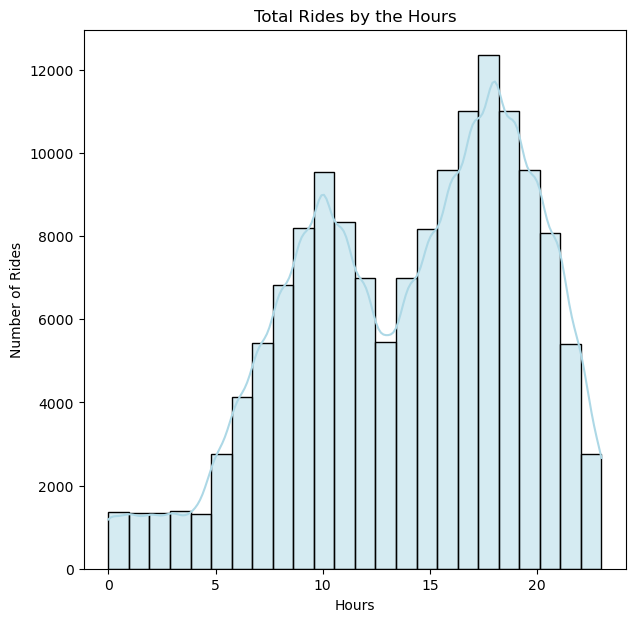

In [539]:
#Rides by Hour

plt.figure(figsize=(7,7))
sns.histplot(df['Hours'], bins= 24, kde=True, color='lightblue')
plt.title('Total Rides by the Hours')
plt.xlabel('Hours')
plt.ylabel('Number of Rides')
plt.show()

In [540]:
# based on this histogram plot, the 18th hour gets the most rides in a day while 10th hour gets the second most (6:00 pm and 10:00 am)

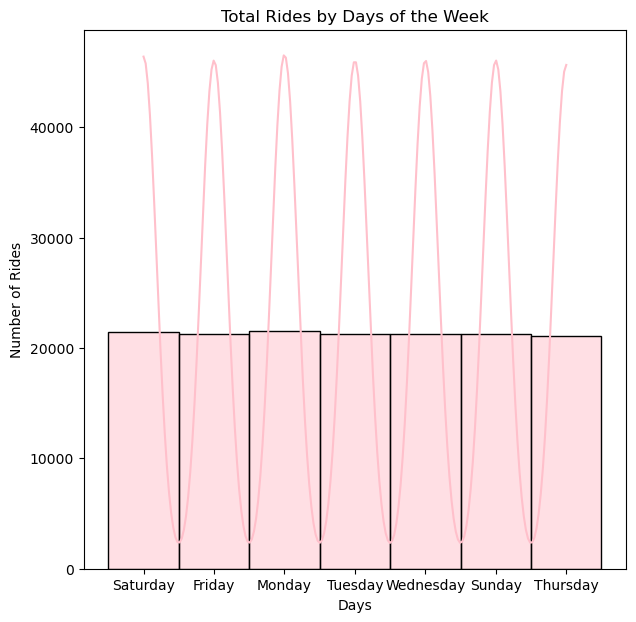

In [541]:
# Rides by Days of the Week

plt.figure(figsize=(7,7))
sns.histplot(df['Weekdays'], bins= 7, kde=True, color='pink')
plt.title('Total Rides by Days of the Week')
plt.xlabel('Days')
plt.ylabel('Number of Rides')
plt.show()

In [542]:
# based on this histogram, the days of the week get approximately same number of rides each day with no significant difference

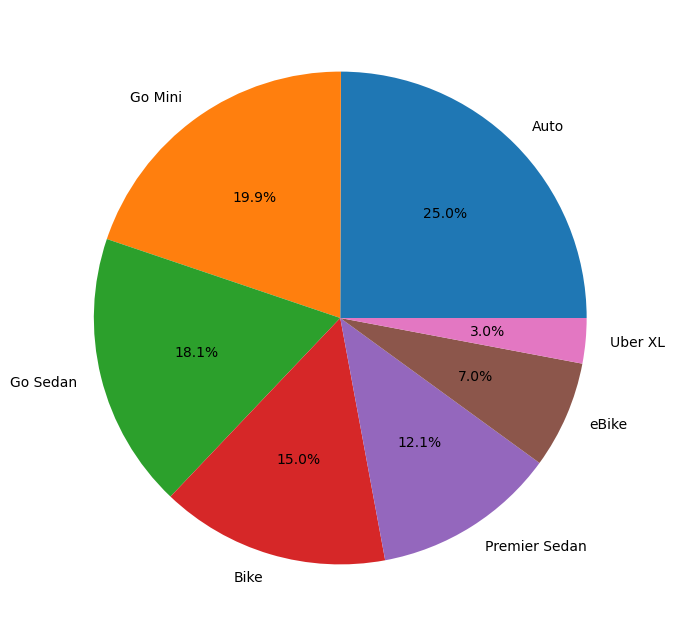

In [556]:
# Vehicle type and Customer Cancelation

vehicle_counts = df['Vehicle Type'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(vehicle_counts, labels=vehicle_counts.index, autopct='%1.1f%%') 
plt.show()

In [ ]:
# From this pie chart, we can see the Auto is the most used vehicle in rides followed by the Go Mini and Go Sedan
# Now we can see how the different vehicle types compare to incomplete rides and cancelations

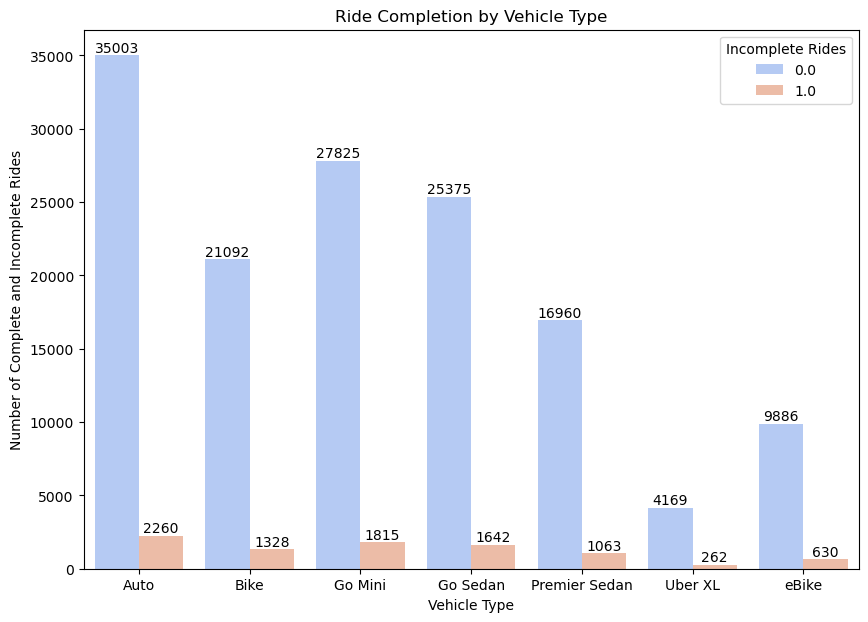

In [592]:
# Incomplete Rides by Vehicle Types

#I want to find the incomplete rides (1 means incomplete 0 means complete) for each vehicle type

completion_counts = df.groupby(['Vehicle Type','Incomplete Rides']).size().reset_index(name='count')

plt.figure(figsize=(10,7))
ax = sns.barplot(x='Vehicle Type', y='count', hue='Incomplete Rides', data=completion_counts, palette='coolwarm')
plt.title('Ride Completion by Vehicle Type')
plt.ylabel('Number of Complete and Incomplete Rides')

#add labels to the bars

for con in ax.containers:
    ax.bar_label(con, fmt='%d')

plt.show()

#df.groupby(['Vehicle Type','Incomplete Rides']).size()
#counts displayed

In [574]:
# From visually looking at the bar plot we see that Uber XL has the lowest cancellations however it also has the lowest bookings
# Most vehicle types seems to have low incomplete rides, therefore it is difficult to spot a clear distingtion on whether the vehicle type causes more cancellations

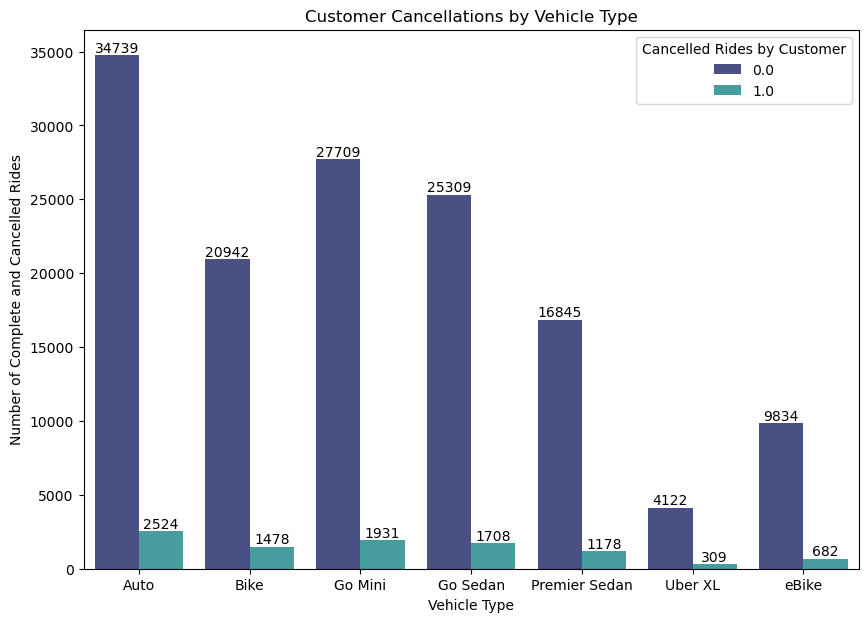

In [595]:
# Customer Cancellation by Vehicle Type

cancellation_counts = df.groupby(['Vehicle Type','Cancelled Rides by Customer']).size().reset_index(name='count')

plt.figure(figsize=(10,7))
ax = sns.barplot(x='Vehicle Type', y='count', hue='Cancelled Rides by Customer', data=cancellation_counts, palette='mako')
plt.title('Customer Cancellations by Vehicle Type')
plt.ylabel('Number of Complete and Cancelled Rides')

for con in ax.containers:
    ax.bar_label(con, fmt='%d')

plt.show()

#df.groupby(['Vehicle Type','Cancelled Rides by Customer']).size()
#counts displayed

In [597]:
# Similar to the incomplete rides, it is difficult to spot a correlation visually between the vehicle types
# the plots appear to show that there is no relation between customer cancellation/incompletion and vehicle types

Inferential Statistics

In [ ]:
# Question: Is there a significant difference between the customer cancellations and driver cancellations?

In [ ]:
# Null Hypothesis (H0): There is no significant difference between the customer cancellations and driver cancellations.

In [630]:
from scipy.stats import chi2_contingency

#contingency table: compares relationship between 2 categories
#shows count of observations for 2 categorical variables

#significance_level = 0.05

contingency_table = pd.crosstab(df['Cancelled Rides by Customer'],df['Cancelled Rides by Driver'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
#dof = (row-1)*(col-1)


print('Contingency Table:')
print(contingency_table)

print()
print('\nChi2 Stat:', chi2_stat)
print('p-value:', p_value)
print('Degrees of Freedom:', dof)

Contingency Table:
Cancelled Rides by Driver       0.0    1.0
Cancelled Rides by Customer               
0.0                          112500  27000
1.0                            9810      0


Chi2 Stat: 2316.544473817287
p-value: 0.0
Degrees of Freedom: 1


In [648]:
# The p-value of 0.0 is less than the significance value of 0.05 
# So, we reject the null hypothesis that there is no significant difference between the customer cancellations and driver cancellations

In [627]:
#Pickup Locations

pickup_counts = df['Pickup Location'].value_counts()
pickup_counts

Pickup Location
Khandsa             946
Barakhamba Road     940
Saket               927
Pragati Maidan      918
Madipur             916
                   ... 
Chirag Delhi        796
Noida Sector 18     796
Ashok Vihar         794
Laxmi Nagar         789
Ghitorni Village    783
Name: count, Length: 176, dtype: int64

In [628]:
# Is there a significant difference between the number of rides per Pickup Location

In [636]:
# Null Hypothesis: There is no significant difference between the number of rides per Pickup Location

In [644]:
from scipy.stats import chisquare

#significance_level = 0.05

chi2_stat, p_value = chisquare(pickup_counts)

print('Chi2 Stat:', chi2_stat)
print('P Value:', p_value)

Chi2 Stat: 187.06870269908245
P Value: 0.2526149741617128


In [645]:
# Since the p-value of ~0.2526 is greater than the significance level of 0.05 
# we fail to reject the null hypothesis that there is no significant difference between the number of rides per Pickup Location

In [634]:
#Drop Locations

drop_counts = df['Drop Location'].value_counts()
drop_counts

Drop Location
Ashram              932
Basai Dhankot       916
Lok Kalyan Marg     913
Narsinghpur         909
Kalkaji             908
                   ... 
MG Road             792
Shivaji Park        786
Bhiwadi             786
Anand Vihar ISBT    781
Huda City Centre    771
Name: count, Length: 176, dtype: int64

In [635]:
# Is there a significant difference between the number of rides per Drop Location

In [641]:
# Null Hypothesis (H0): There is no significant difference between the number of rides per Drop Location

In [643]:
from scipy.stats import chisquare

#significance_level = 0.05

chi2_stat, p_value = chisquare(drop_counts)

print('Chi2 Stat:', chi2_stat)
print('P Value:', p_value)

Chi2 Stat: 172.41441296631172
P Value: 0.5410992349303618


In [639]:
# Since the p-value of ~0.5410 is greater than the significance level of 0.05 
# we fail to reject the null hypothesis that there is no significant difference between the number of rides per Drop Location

In [640]:
# Is there a relationship between the Pickup and Drop Locations

In [642]:
# Null Hypothesis (H0): Pickup Locations and Drop Locations are independent of one another

In [647]:
#significance_level = 0.05

contingency_table = pd.crosstab(df['Pickup Location'],df['Drop Location'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
#dof = (row-1)*(col-1)


#print('Contingency Table:')
#print(contingency_table)

print()
print('\nChi2 Stat:', chi2_stat)
print('p-value:', p_value)
print('Degrees of Freedom:', dof)



Chi2 Stat: 31677.942628437762
p-value: 1.2801779991529459e-05
Degrees of Freedom: 30625


In [651]:
# Since the p-value of ~1.28017e-05 is less than the the significance level of 0.05
# we reject the null hypothesis that the Pickup and Drop Locations are independent of one another